In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/labib15/Machine-Learning-Datasets/main/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

As observed above we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

In [5]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Let's split the data randomly into training and test set.

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.

In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split



> Train-Test split from the full dataset



In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)



> Train-valid split from the original TRAIN split



In [8]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.25,random_state=42, stratify=y_train)

In [9]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

hyperparameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, hyperparameters)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)


0.7987012987012987





> **Here we want to see the best parameters**





In [10]:
print('Best C:',clf.best_estimator_.C,"\n")
print('Best Kernel:',clf.best_estimator_.kernel,"\n")

Best C: 10 

Best Kernel: linear 







> **How original SVM performed**




In [17]:
svm_base = svm.SVC()
svm_base.fit(X_train, y_train)
svm_base.score(X_test, y_test)

0.7142857142857143




> **How tuned SVM performed**


*We can see that our hyper tuned SVM performed better than original SVM*




In [14]:
svc_tuned = svm.SVC(kernel ='linear', C = 10)
svc_tuned.fit(X_train, y_train)
svc_tuned.score(X_test, y_test)

0.7207792207792207

## Cross-Validation
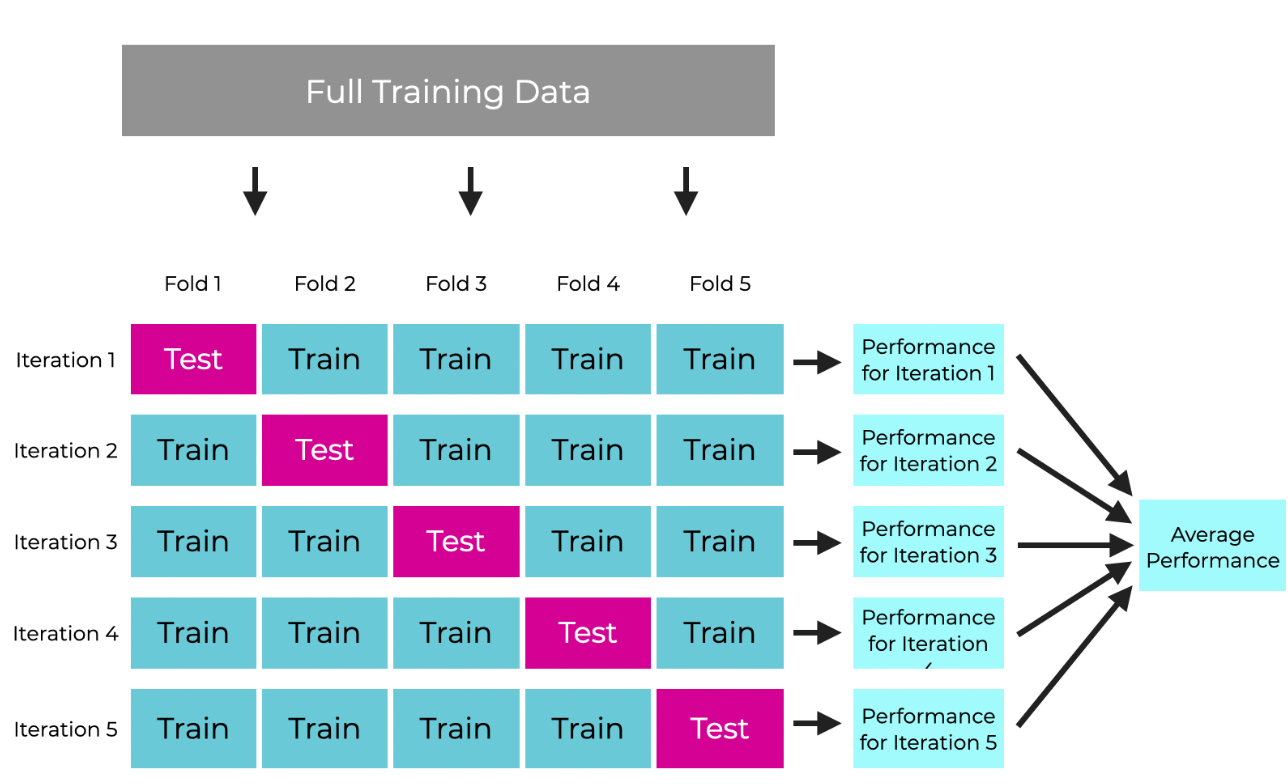

In [18]:

from sklearn.model_selection import cross_val_score


scores = cross_val_score(svc, X, np.ravel(y,order='C'), cv=5, scoring="accuracy")
print(f"SVM: {scores.mean():.3f}")


SVM: 0.759
